In [1]:
import pandas as pd

In [8]:
s = pd.Series([1,3,5,7,9])

In [9]:
s2 = pd.Series([2,4,6,8,10])

In [10]:
s + s2

0     3
1     7
2    11
3    15
4    19
dtype: int64

In [12]:
s.iloc[2:4]

2    5
3    7
dtype: int64

In [13]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [15]:
type(s.values)

numpy.ndarray

In [17]:
s.value_counts()

9    1
1    1
3    1
5    1
7    1
dtype: int64

In [18]:
pd.DataFrame([[1,2,3], [4,5,6]])

,0,1,2
0,1,2,3
1,4,5,6


In [19]:
pd.DataFrame(columns=['ime', 'godine'], data=[['pera', 23], ['maja', 22]])

,ime,godine
0,pera,23
1,maja,22


In [46]:
people = {'ime': pd.Series(['pera', 'maja']),
          'godine': pd.Series([23])}
df = pd.DataFrame(people)

In [47]:
df.dtypes

ime        object
godine    float64
dtype: object

In [49]:
df

,ime,godine
0,pera,23.0
1,maja,NaN


In [51]:
df.isna()

,ime,godine
0,False,False
1,False,True


In [53]:
df.dropna()

,ime,godine
0,pera,23.0


In [54]:
df.fillna(0)

,ime,godine
0,pera,23.0
1,maja,0.0


In [34]:
df['ime'][0]

'pera'

In [33]:
df[ ['ime', 'godine'] ] 

,ime,godine
0,pera,23
1,maja,22


In [35]:
df.iloc[0, 1]

23

In [36]:
df.loc[0]

ime       pera
godine      23
Name: 0, dtype: object

In [39]:
df[df['godine'] > 22][['ime']]

,ime
0,pera


In [56]:
df = pd.read_csv('../iris.csv')

In [57]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
df.shape

(150, 5)

In [60]:
df.isna().any()

Sepal_Length    False
Sepal_Width     False
Petal_Length    False
Petal_Width     False
Species         False
dtype: bool

In [61]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


In [62]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [69]:
feature_names = df.columns[:-1].tolist()
feature_names

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [70]:
X = df[feature_names]
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [72]:
y = df['Species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [75]:
X_train.shape

(105, 4)

In [76]:
X_test.shape

(45, 4)

In [77]:
y_train.shape

(105,)

In [78]:
y_test.shape

(45,)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
model = DecisionTreeClassifier(criterion='entropy')

In [81]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [83]:
model.feature_importances_

array([0.06106443, 0.        , 0.00868347, 0.9302521 ])

In [84]:
y_train_predicted = model.predict(X_train)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
accuracy_score(y_train, y_train_predicted)

1.0

In [89]:
confusion_matrix(y_train, y_train_predicted)

array([[35,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 35]], dtype=int64)

In [90]:
y_test_predicted = model.predict(X_test)

In [91]:
accuracy_score(y_test, y_test_predicted)

0.9333333333333333

In [92]:
confusion_matrix(y_test, y_test_predicted)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

In [96]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [97]:
from sklearn import tree
from matplotlib import pyplot as plt

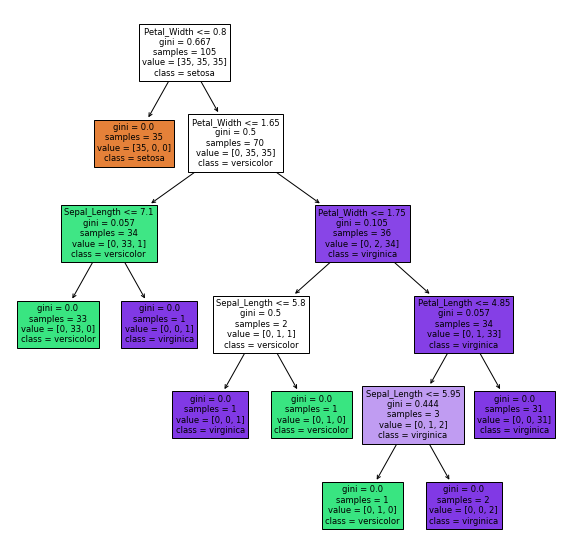

In [102]:
plt.figure(figsize=(10,10))
_ = tree.plot_tree(model, feature_names=feature_names, class_names=model.classes_, filled=True)

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameters = {'criterion' : ['gini', 'entropy'],
              'max_depth': [2,3,4],
              'min_samples_leaf': [2,4]}

model = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', cv=5)

In [105]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 4]},
             scoring='accuracy')

In [106]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}

In [107]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [108]:
model.best_score_

0.961904761904762

In [109]:
y_predicted = model.predict(X_test)

In [110]:
accuracy_score(y_test, y_predicted)

0.9333333333333333

In [111]:
confusion_matrix(y_test, y_predicted)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)